In [2]:
#!pip install google-cloud-bigquery

ERROR: mysql-connector-python 8.0.30 has requirement protobuf<=3.20.1,>=3.11.0, but you'll have protobuf 4.24.4 which is incompatible.
You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0


In [5]:
#!pip install google-cloud-bigquery
# !pip install google-cloud
# !pip install google-cloud-bigquery[pandas]
# !pip install google-cloud-storage

You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%load_ext google.cloud.bigquery

In [5]:
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/acer/Downloads/snappy-benefit-338107-3ad788655b2b.json'

In [ ]:
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'snappy-benefit-338107-3ad788655b2b.json'

In [6]:
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
client = bigquery.Client() #OOP

In [ ]:
client says that BQ functions can now be started to be used in JN 

In [9]:
sql = """ 
SELECT
*
FROM
`snappy-benefit-338107.test3.place_info` limit 1
"""

df1 = client.query(sql).to_dataframe()
df1.head()

,place_id,name,condition,location,ports,solar_non_metered,length,breadth,remarks,area_code,updated_date
0,1003,8th & Guadalupe,closed,800 Guadalupe St.,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00


This the table for 

In [10]:
x = """ 
SELECT
*
FROM
`snappy-benefit-338107.test3.rides` limit 1
"""

df2 = client.query(x).to_dataframe()
df2.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [28]:
x = """ 
With row_num as ( 
select distinct b.location, a.total_time
FROM `snappy-benefit-338107.test3.rides` a
join `snappy-benefit-338107.test3.place_info` b
on a.source_id = b.place_id)

select location from
(select location, ROW_NUMBER() OVER(order by total_time desc) as rn
from row_num)
where rn <= 5

"""

df2 = client.query(x).to_dataframe()
df2.head()

,location
0,5104 East 5th. Street
1,698 Davis St
2,600 Congress Ave.
3,606 Trinity Street
4,1611 W 5th St


In [33]:
x = """ 
With row_num as (select membership_type,total_time,
ROW_NUMBER() OVER(partition by membership_type order by total_time desc) as rn
FROM `snappy-benefit-338107.test3.rides` 
where membership_type is not null
order by 1,3)

select membership_type,total_time 
from row_num where rn <=5
order by 1,2 desc

"""

df2 = client.query(x).to_dataframe()
df2.head(60)

,membership_type,total_time
0,24 Hour Walk Up Pass,4084
1,24 Hour Walk Up Pass,2306
2,24 Hour Walk Up Pass,1548
3,24 Hour Walk Up Pass,1492
4,24 Hour Walk Up Pass,1407
5,3-Day Weekender,2843
6,3-Day Weekender,1402
7,3-Day Weekender,1176
8,3-Day Weekender,1031
9,3-Day Weekender,1010


In [ ]:
#1 Which top 5 source location have the highest total_time? 
#2 For each membership type what are the top 5 total_time?

In [ ]:
BigQuery --> scalablity, distributed computing
JN --> visualization and readability, systematics codes, structure

In [5]:
sql = """ 
SELECT
source_name,
membership_type,
EXTRACT(HOUR FROM source_time) AS hourofstart,
total_time
FROM
`snappy-benefit-338107.test3.rides`
WHERE
EXTRACT(YEAR FROM source_time) = 2018
AND total_time > 0
"""

df = client.query(sql).to_dataframe()
df.head()

,source_name,membership_type,hourofstart,total_time
0,Zilker Park,Single Trip,15,44
1,Zilker Park,Explorer,14,22
2,Nueces & 3rd,Local30,18,7
3,Nueces & 3rd,Local30,19,10
4,11th & Salina,HT Ram Membership,19,30


In [6]:
df.shape

(19, 4)

# EDA

In [18]:
sql = """ 
SELECT membership_type, round(max(total_time)/60,2) as max_time_mins,
 round(avg(total_time)/60,2) as avg_time_mins
FROM
`snappy-benefit-338107.test3.rides`
group by 1
order by 2 desc
"""

df = client.query(sql).to_dataframe()
df

,membership_type,max_time_mins,avg_time_mins
0,Single Trip (Pay-as-you-ride),87.02,1.06
1,24 Hour Walk Up Pass,68.07,0.83
2,Pay-as-you-ride,58.97,0.86
3,3-Day Weekender,47.38,0.57
4,Local365,47.23,0.37
5,Student Membership,37.70,0.44
6,Walk Up,36.97,0.78
7,Local31,23.78,0.56
8,Weekender,18.77,0.45
9,Explorer,17.80,0.73


Single Trip (Pay-as-you-ride) has the highest max time maybe becuase of adhoc travel plans	

In [21]:
import warnings
warnings.filterwarnings('ignore')

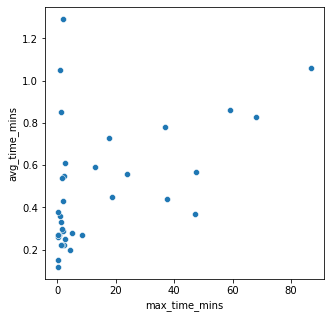

In [22]:
plt.figure(figsize = (5,5))
sns.scatterplot(df['max_time_mins'],df['avg_time_mins'])
plt.show()

""


In [34]:
sql ="""
select * from 
`snappy-benefit-338107.test3.rides`
limit 1
"""

# Run the query, and return a pandas DataFrame
df1 = client.query(sql).to_dataframe()
df1.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [35]:
sql ="""
select * from 
`snappy-benefit-338107.test3.place_info`
limit 1
"""

# Run the query, and return a pandas DataFrame
df2 = client.query(sql).to_dataframe()
df2.head()

,place_id,name,condition,location,ports,solar_non_metered,length,breadth,remarks,area_code,updated_date
0,1003,8th & Guadalupe,closed,800 Guadalupe St.,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00


In [ ]:
# #standardSQL
# WITH stats AS (
#   SELECT DATE(PARSE_TIMESTAMP('%Y/%m/%d %T', datetime)) dt,
#     AVG(qty) - 1.5 * STDDEV(qty) down,
#     AVG(qty) + 1.5 * STDDEV(qty) up
#   FROM `project.dataset.table`
#   GROUP BY dt
# )
# SELECT port, qty, datetime 
# FROM `project.dataset.table`
# JOIN stats 
# ON dt = DATE(PARSE_TIMESTAMP('%Y/%m/%d %T', datetime))
# WHERE NOT qty BETWEEN down AND up  

In [52]:
sql ="""
select total_time from
`snappy-benefit-338107.test3.rides`
"""

# Run the query, and return a pandas DataFrame
total_time = client.query(sql).to_dataframe()
total_time.head()

,total_time
0,52
1,11
2,36
3,36
4,43


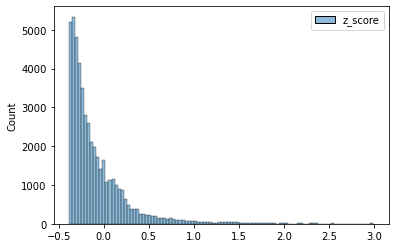

In [53]:
sns.histplot(z_score,bins=100)
plt.show()

In [54]:
total_time.describe()

,total_time
count,50000.000000
mean,37.247400
std,91.490795
min,2.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,5221.000000


In [ ]:
z score --

total time --> z score = (x- mean(tt))/std(tt)

z>3 or z<-3

In [ ]:
tt, avg, std  tt-avg, tt-avg/std= z score
20  15    3
30   15    3
10   15    3
3     15   3


In [34]:
sql ="""
with diff as 
(select total_time - AVG(total_time) OVER() as num,
STDDEV_POP(total_time) OVER() as denom from
`snappy-benefit-338107.test3.rides`)

select num/denom as z_score from diff
where num/denom<=3 and num/denom >=-3
"""

# Run the query, and return a pandas DataFrame
z_score = client.query(sql).to_dataframe()
z_score

,z_score
0,0.161248
1,-0.286889
2,-0.013634
3,-0.013634
4,0.062877
...,...
49468,-0.254098
49469,-0.210377
49470,-0.286889
49471,-0.155727


In [ ]:
IQR outlier handling

Q1 = 25TH PERCENTILE
Q3 = 75TH PERCENTILE

iqr = Q3-Q1

where x < Q1-1.5*iqr  or >Q3+1.5*IQR

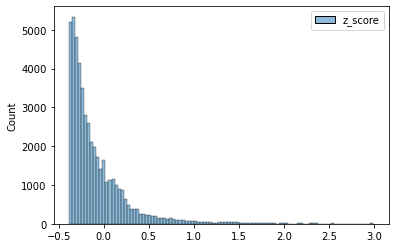

In [51]:
sns.histplot(z_score,bins=100)
plt.show()

In [55]:
z_score.describe()

,z_score
count,49473.000000
mean,-0.078776
std,0.361308
min,-0.385260
25%,-0.297819
50%,-0.199447
75%,0.019156
max,2.992163


In [42]:
sql = """ 
SELECT
*
FROM
`snappy-benefit-338107.test3.rides`
"""

df = client.query(sql).to_dataframe()
df.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52
1,27566467,Pay-as-you-ride,19734,electric,2022-08-23 18:29:20+00:00,7189,28th/Rio,4879,16th/San Antonio,11
2,27412332,Local31,21699,electric,2022-08-07 15:43:58+00:00,7189,28th/Rio,4879,16th/San Antonio,36
3,27731417,Local31,21829,electric,2022-09-06 14:42:16+00:00,7189,28th/Rio,4879,16th/San Antonio,36
4,27824278,Explorer,19177,electric,2022-09-14 11:27:37+00:00,7189,28th/Rio,4879,16th/San Antonio,43


In [43]:
df['source_name'].unique()

array(['28th/Rio', '22nd/Pearl', '3rd/Nueces', '4th/Sabine', '6th/Lavaca',
       '8th/Lavaca', 'Pease Park', '11th/Salina', '6th/Trinity',
       'Main Office', 'Zilker Park', '13th/Trinity', '5th/Campbell',
       '6th/Chalmers', '6th/Congress', 'Lavaca & 6th', 'Nueces & 3rd',
       'Nueces @ 3rd', 'Rainey/Davis', '11th & Salina', '8th/Red River',
       '9th/Henderson', '10th/Red River', '6th & Congress',
       '22.5/Rio Grande', '23rd/Rio Grande', '28th/Rio Grande',
       '8th/San Jacinto', 'Guadalupe & 6th', 'Henderson & 9th',
       'Rainey/Driskill', 'Republic Square', 'Rio Grande/12th',
       'Rosewood/Chicon', '11th/San Jacinto', '16th/San Antonio',
       '5th & San Marcos', 'One Texas Center', 'Waller & 6th St.',
       'Zilker Park West', 'Palmer Auditorium', 'Rainey @ River St',
       'Rosewood & Chicon', 'Rosewood/Angelina', '11th & San Jacinto',
       '13th & San Antonio', 'Barton Springs Pool', 'Lake Austin/Enfield',
       'South Congress/Mary', 'East 11th/San Ma

# Machine Learning

In [39]:
# Create a Linear regression model
sql = """ 
CREATE or REPLACE MODEL `snappy-benefit-338107.test3.lir_1`
OPTIONS
(model_type='linear_reg', labels=['total_time'],
optimize_strategy = 'batch_gradient_descent',

CATEGORY_ENCODING_METHOD = 'ONE_HOT_ENCODING' 

) AS
SELECT
source_name,
membership_type,
EXTRACT(HOUR FROM source_time) AS hourofstart,
total_time
FROM
`snappy-benefit-338107.test3.rides`
WHERE
EXTRACT(YEAR FROM source_time) <= 2021
AND total_time > 0

"""
df = client.query(sql).to_dataframe()
df.head()

""


In [ ]:
response encoding

In [ ]:
source name , source origin_hour --> predict cnt of rides 


cnt of rides

    W = (XT*X)-1XTY

In [42]:
sql = """ 
CREATE OR REPLACE TABLE `snappy-benefit-338107.test3.train_lir` AS
SELECT 
    IFNULL(source_name, "") as source_name,
    TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
    COUNT(*) as num_rides
FROM `snappy-benefit-338107.test3.rides`
WHERE DATE(source_time) < '2022-01-01'
GROUP BY source_name, source_time
ORDER BY source_name, source_time

"""

df_train = client.query(sql).to_dataframe()
df_train.head()

""


In [45]:
sql = """
CREATE OR REPLACE MODEL`snappy-benefit-338107.test3.lir_2`
OPTIONS(model_type='linear_reg', optimize_strategy = 'batch_gradient_descent') AS 
SELECT 
    source_name,
    source_hour,
    num_rides as label
FROM `snappy-benefit-338107.test3.train_lir`

"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [19]:
sql = """
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `snappy-benefit-338107.test3.m1`)
ORDER BY iteration 
"""
df_t= client.query(sql).to_dataframe()
df_t

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.010395,0.010828,0.1,2476
1,0,1,0.000487,0.000852,0.1,3126
2,0,2,0.000387,0.000746,0.1,3132
3,0,3,0.000386,0.000744,0.1,2596


In [47]:
sql = """
SELECT
  *
FROM ML.EVALUATE(MODEL `snappy-benefit-338107.test3.lir_2`, (
    SELECT 
    IFNULL(source_name, "") as source_name,
    TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
    COUNT(*) as label
FROM `snappy-benefit-338107.test3.rides`
WHERE DATE(source_time) >= '2022-01-01'
GROUP BY source_name, source_time
ORDER BY source_name, source_time))

"""

df_test= client.query(sql).to_dataframe()
df_test.head()

BadRequest: 400 Invalid table-valued function ML.EVALUATE
Data input to EVALUATE must include a 'total_time' column. at [4:6]

Location: US
Job ID: ced010e8-0494-4614-b74e-5fc8a2a596c3


In [46]:
sql = """
SELECT
  *
FROM ML.EVALUATE(MODEL `snappy-benefit-338107.test3.lir_2`, (
    SELECT 
    IFNULL(source_name, "") as source_name,
    TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
    COUNT(*) as label
FROM `snappy-benefit-338107.test3.rides`
WHERE DATE(source_time) >= '2022-01-01'
GROUP BY source_name, source_time
ORDER BY source_name, source_time))

"""

df_test= client.query(sql).to_dataframe()
df_test.head()


,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.134314,0.020297,0.005522,0.11065,-135.940498,-14.223643


In [30]:
sql = """
SELECT
    source_name,
    SUM(predicted_label) as predicted_total_rides,
    (SUM(predicted_label)/(365*24)) as avg_predicted_rides_hourly,
    SUM(label) as actual_total_rides,
    (SUM(label)/(365*24)) as actual_avg_rides_hourly
FROM ML.PREDICT(MODEL `snappy-benefit-338107.test3.m1`, (
  SELECT
        IFNULL(source_name, "") as source_name,
        TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
        COUNT(vehicle_no) as label
    FROM
        `snappy-benefit-338107.test3.rides`
    WHERE
        DATE(source_time) BETWEEN '2018-01-01' AND '2019-01-01' AND source_name = '11th & San Jacinto'
    GROUP BY source_name, source_time
    ORDER BY source_name, source_time))
GROUP BY source_name

"""
x_query = client.query(sql).to_dataframe()
x_query.head()

,source_name,predicted_total_rides,avg_predicted_rides_hourly,actual_total_rides,actual_avg_rides_hourly
0,11th & San Jacinto,0.890292,0.000102,1,0.000114


In [32]:
sql ="""
SELECT 
    EXTRACT(YEAR from source_time) as year,
    COUNT(*) as total_num_rides,
    (COUNT(2)/(365*COUNT(DISTINCT source_name))) as avg_rides_per_station_daily
FROM  `snappy-benefit-338107.test3.rides`
GROUP BY year
ORDER BY year
"""

x_f = client.query(sql).to_dataframe()
x_f.head()

,year,total_num_rides,avg_rides_per_station_daily
0,2013,29,0.079452
1,2014,3084,0.337973
2,2015,6042,0.551781
3,2016,4930,0.435705
4,2017,5426,0.495525


In [34]:
df.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [35]:
sql = """
CREATE OR REPLACE MODEL`snappy-benefit-338107.test3.m2`
OPTIONS
  (model_type='linear_reg',
  input_label_cols=['total_time']) AS
SELECT
  *
FROM
  `snappy-benefit-338107.test3.rides`
WHERE
  total_time IS NOT NULL
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [37]:
sql = """
SELECT
  *
FROM
  ML.EVALUATE(MODEL `snappy-benefit-338107.test3.m2`,
    (
    SELECT
      *
    FROM
   `snappy-benefit-338107.test3.rides`
    WHERE
      total_time IS NOT NULL))
      """
df_m = client.query(sql).to_dataframe()
df_m.head()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,11010.213833,2.148061e+12,1.281059,19.055801,-2.566259e+08,-2.566122e+08


In [38]:
sql = """
SELECT
  *
FROM
  ML.EVALUATE(MODEL `snappy-benefit-338107.test3.m2`)

      """
df_m = client.query(sql).to_dataframe()
df_m.head()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,54575.851643,1.067201e+13,1.444246,19.556121,-1.612523e+09,-1.612092e+09


In [41]:
df.head(10)

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [ ]:
create or replace model --> creates ML model
ML.training_info --> training loss, data information
ML.evaluate --> evaluation metrics
ML.predict --> performs scoring/gives predictions


In [ ]:
GCP BQ table --> dashboard
MLOPS --> model serving

In [ ]:
# Airflow
# In house tools

In [45]:
sql = """
SELECT
  *
FROM
  ML.PREDICT(MODEL `snappy-benefit-338107.test3.m2`,
    (
    SELECT
      *
    FROM
     `snappy-benefit-338107.test3.rides`
    WHERE
      total_time IS NOT NULL
      AND source_name = "Nueces @ 3rd"))
"""
df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-11.995947,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.000947,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,27.494153,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,25.725271,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,13.851559,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [49]:
sql = """
SELECT
  *
FROM
  ML.EXPLAIN_PREDICT(MODEL `snappy-benefit-338107.test3.m2`,
    (
    SELECT
      *
    FROM
       `snappy-benefit-338107.test3.rides`
    WHERE
      total_time IS NOT NULL
       AND source_name = "Nueces @ 3rd"),
    STRUCT(3 as top_k_features))
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-12.093243,"[{'feature': 'vehicle_no', 'attribution': 6782...",-1.538682e+08,-12.093243,0.0,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.226541,"[{'feature': 'vehicle_no', 'attribution': 6782...",-1.538682e+08,34.226541,0.0,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,27.147916,"[{'feature': 'vehicle_no', 'attribution': 6782...",-1.538682e+08,27.147916,0.0,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,25.520481,"[{'feature': 'vehicle_no', 'attribution': 6782...",-1.538682e+08,25.520481,0.0,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,14.285605,"[{'feature': 'vehicle_no', 'attribution': 6782...",-1.538682e+08,14.285605,0.0,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [58]:
df_m['top_feature_attributions'].apply(lambda x : x[0])[0]

{'feature': 'vehicle_no', 'attribution': 678270136.5042584}

In [ ]:
w1x1 + w2x2 +... + w0 = Y'

W1 = membership type 


In [64]:
abs(367605073.3773508) > 207991396.07861787

True

In [60]:
df_m['top_feature_attributions'].apply(lambda x : x[1])[0]

{'feature': 'source_time', 'attribution': -367605073.3773508}

In [61]:
df_m['top_feature_attributions'].apply(lambda x : x[2])[0]

{'feature': 'source_name', 'attribution': -207991396.07861787}

In [46]:
sql = """
SELECT
  *
FROM
  ML.EXPLAIN_PREDICT(MODEL `snappy-benefit-338107.test3.m2`,
    (
    SELECT
      *
    FROM
       `snappy-benefit-338107.test3.rides`
    WHERE
      total_time IS NOT NULL
       AND source_name = "Nueces @ 3rd"),
    STRUCT(3 as top_k_features))
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-11.995947,"[{'feature': 'source_time', 'attribution': 313...",-1.160430e+08,-11.995947,0.0,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.000947,"[{'feature': 'source_time', 'attribution': 313...",-1.160430e+08,34.000947,0.0,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,27.494153,"[{'feature': 'source_time', 'attribution': 313...",-1.160430e+08,27.494153,0.0,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,25.725271,"[{'feature': 'source_time', 'attribution': 313...",-1.160430e+08,25.725271,0.0,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,13.851559,"[{'feature': 'source_time', 'attribution': 313...",-1.160430e+08,13.851559,0.0,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [48]:
df_m['top_feature_attributions'].apply(lambda x: x[0])

KeyError: 'top_feature_attributions'

In [ ]:
response or target encoding

In [ ]:
v1  - 1011
v2 -  500
v3
v4

In [ ]:
group by vehicle number avg(trip time)

In [ ]:
v1 --att --> 0.3
v2 -- att --> 90.1
v3 --att
v4 -- att
v5 --att

In [ ]:
vehicle number -->
v1 --0.3
v1
v2 --> 90.1
v3
v2
v3
v4
v5

In [ ]:
vehicle number --> 10 rows



In [ ]:
vehicle no--> driver id--> driver behavior--> trip time
vehicle number 

In [59]:
sql = """
CREATE OR REPLACE MODEL `snappy-benefit-338107.test3.m2`
OPTIONS
  (model_type='linear_reg',
  input_label_cols=['total_time'],
  enable_global_explain=TRUE) AS
SELECT
  *
FROM
  `snappy-benefit-338107.test3.rides`
WHERE
  total_time IS NOT NULL
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [61]:
sql = """
SELECT
  *
FROM
  ML.GLOBAL_EXPLAIN(MODEL `snappy-benefit-338107.test3.m2`)
  
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,feature,attribution
0,vehicle_no,6.781354e+08
1,source_time,3.676068e+08
2,source_name,2.080811e+08
3,membership_type,7.410647e+07
4,dest_name,2.277237e+07


In [62]:
sql = """

CREATE TABLE `snappy-benefit-338107.test3.rides_train` AS
SELECT
  * EXCEPT(total_time), total_time AS label
FROM
  `snappy-benefit-338107.test3.rides`
WHERE
  total_time IS NOT NULL
LIMIT 40000

  
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [63]:
sql = """

CREATE MODEL `snappy-benefit-338107.test3.m3`
OPTIONS
  (MODEL_TYPE='LINEAR_REG',
   NUM_TRIALS=20,
   MAX_PARALLEL_TRIALS=2) AS
SELECT
  *
FROM
  `snappy-benefit-338107.test3.rides_train`
    
  
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [ ]:
sql = """

CREATE MODEL `snappy-benefit-338107.test3.m4`
OPTIONS
  (MODEL_TYPE='LINEAR_REG',
   
   NUM_TRIALS=20,
   MAX_PARALLEL_TRIALS=2,
   L1_REG=HPARAM_RANGE(0, 20),
   L2_REG=HPARAM_CANDIDATES([0, 0.1, 1, 10]),
   HPARAM_TUNING_ALGORITHM = "VIZIER_DEFAULT",
   HPARAM_TUNING_OBJECTIVES = ["r2_score"]
  )s
    AS
SELECT
  *
FROM
  `snappy-benefit-338107.test3.rides_train`
    
  
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

In [ ]:
sql = """
SELECT *
FROM
  ML.TRIAL_INFO(MODEL `snappy-benefit-338107.test3.m4`)

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

In [ ]:
sql = """
SELECT *
FROM
  ML.EVALUATE(MODEL `snappy-benefit-338107.test3.m4`)

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

In [ ]:
sql = """
SELECT
  *
FROM
  ML.PREDICT(MODEL `snappy-benefit-338107.test3.m4`,
    (
    SELECT
      *
    FROM
      `snappy-benefit-338107.test3.rides_train`))

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

In [ ]:
#Try XGBoost and other ML algorithms

In [ ]:
Tableau db--> predicions
GC BQ Model -- predct--> BQ table --> Tableau




live predictions




In [ ]:
MLOPS --> bring GCP BQ model --> API--> read by the app 

In [ ]:
#Factors
#Find the best model
#Decide what are the main models
#